# Phase1 Project: Aviation Accidents Data Analysis and Insights

## Overview
The project seeks to explore data on different aircrafts accidents in order to advise company stakeholders on which type of aircraft to choose for business as they would like to join this industry. The [dataset&rArr;](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses), from the National Transportation Safety Board that includes aviation accident data and selected incidents covering United States, its territories and international waters from 1962 and later.

## Business
The company is seeking to start a new business endeavor, operating aircrafts for commercial and private enterprises, in which they are novice to it. The stakeholders are seeking to understand what type of aircrafts have low risk to accidents from prevoius occurences. 

The dataset has various incidents since 1962. The information on the database is on continual update once an incident happens. Using this data would help identify the patterns/trends on these occurences. 

At the end of the data analysis, getting aircraft types which are low-risk we need to answer questions such as: 
    
    what factors should we consider for low risk. This may include looking at the number of injuries, level of damage, etc.

    What make have minimal or no accidents, which models specifically?
    
    what level of damage did they acquire during those incidences?
    
 This would aid in making decisions on which type of aircrafts to purchase.

## Data
Let's check what the data is about. We will use python methods and its libraries to explore the data.

In [316]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [317]:
#Open and reeding the datasets
aviation_df = pd.read_csv("AviationData.csv", encoding='cp1252', engine='python')# or use 'low_memory=False'
usstate_df = pd.read_csv("USState_Codes.csv", encoding='cp1252')

In [318]:
#get top 5 rows of aviation data
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


From the first five records, we see that there are some null values.

In [319]:
#check the last five records
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [320]:
# Get the shape of the data, rows and columns
aviation_df.shape

(88889, 31)

In [321]:
#get information about the data, including the datatypes of respective columns
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [322]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


From the above data, we can see aviation dataset has 88,889 rows with 35 columns. It gives info on aircraft type, location, country where the incident occured, information about the aircraft, dates, etc.

There are missing data from the null values seen in the data. The dataset has numbers on injuries - fatal, seroius or minor ones, and number of engines of the aircraft.

In [323]:
##get top 5 rows of USState Codes data
usstate_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [324]:
usstate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


The data from USState codes contains 62 rows, showing 62 states and 2 columns showing the States in the data and the respective abbreviation.
There are no null values

In [325]:
usstate_df.shape

(62, 2)

In [326]:
#Check the columns in the aviation publish_display_data
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [327]:
#let us check if the data has columns that have similar content on both aviation and usstate codes
usstate_df['US_State'].isin(aviation_df['Country']).value_counts()


False    54
True      8
Name: US_State, dtype: int64

In [328]:
len(aviation_df.columns)

31

## Data Preparation
Let us prepare the data for analysis. This will/may involve handling missing values in the data, dropping unnecessary columns, selecting needed data, etc.

We start by checking the essential columns and dropping the unnecessary ones.

1. The company needs 'Airplane'. If you check the AircraftCategory, there are aircraft of the Airplane Category. So we will create a dataset of that category.

2. To determine the low risk aircraft, it needs specific kind of data such as the model, make, category, engine type, level of damage, number of injuries, etc.
Columns such as Event Id, Investigation Type, Accident Number, etc. may not be useful. So we will drop these columns

3. The data may be having spaces at the edges, we will strip the empty spaces in case the are present.

4. Then we rename the columns to be easy handling by removing dots on column names 

5. Check null values and see how to handle them, drop, replace by mode , mean or median.
As noticed earlier, there are only 4 columns without null values in the aviation data i.e.:

        1. 'Event.Id' 
        2. 'Investigation.Type'
        3. 'Accident.Number'
        4. 'Event.Date'

In [329]:
#First let us make a copy of the data
aviation_df_copy = aviation_df.copy(deep=True)

In [330]:
#Checking the columns of aviation data
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [331]:
#Check Aircraft Category
aviation_df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [332]:
#creating Airplane dataset
airplane_df = aviation_df.loc[aviation_df["Aircraft.Category"] == "Airplane"].reset_index(drop=True)
airplane_df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
1,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
2,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
3,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
4,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [333]:
#Confirming if the aircraft is  "Airplane" type only
airplane_df['Aircraft.Category'].value_counts()

Airplane    27617
Name: Aircraft.Category, dtype: int64

In [334]:
#dropping columns as they will not be needed for anaylsis. Note "Broadphaseofflight" has no much data
airplane_df.drop(["Event.Id","Investigation.Type", "Accident.Number", "Airport.Code", "Airport.Name", "Air.carrier", "Schedule", "Report.Status", "Publication.Date"], axis=1,inplace = True)
airplane_df.head()

,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,...,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,...,2.0,Turbo Fan,Part 129: Foreign,NaN,NaN,NaN,1.0,44.0,VMC,Climb
1,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,N2482N,Cessna,...,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff
2,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,...,2.0,Reciprocating,Part 91: General Aviation,Business,0.0,0.0,0.0,2.0,IMC,Landing
3,1982-01-02,"HOMER, LA",United States,NaN,NaN,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,...,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,1.0,0.0,IMC,Cruise
4,1982-01-02,"HEARNE, TX",United States,NaN,NaN,Fatal(1),Destroyed,Airplane,N758SK,Cessna,...,1.0,Reciprocating,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff


In [88]:
airplane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27617 entries, 0 to 27616
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              27617 non-null  object 
 1   Location                27610 non-null  object 
 2   Country                 27610 non-null  object 
 3   Latitude                22092 non-null  object 
 4   Longitude               22083 non-null  object 
 5   Injury.Severity         26803 non-null  object 
 6   Aircraft.damage         26335 non-null  object 
 7   Aircraft.Category       27617 non-null  object 
 8   Registration.Number     27391 non-null  object 
 9   Make                    27608 non-null  object 
 10  Model                   27586 non-null  object 
 11  Amateur.Built           27600 non-null  object 
 12  Number.of.Engines       24863 non-null  float64
 13  Engine.Type             23391 non-null  object 
 14  FAR.Description         27118 non-null

In [89]:
airplane_df.columns

Index(['Event.Date', 'Location', 'Country', 'Latitude', 'Longitude',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

If you check, the column names have a '.' separator between 2 names. We can remove the dot for each column name.
Then we can strip of any empty spaces in the data.

In [90]:
#Let us remove the dot(.) in the column names
#First create a dictionary with key-value pairs consisting of old names as keys and new names as keys
#create keys append them to an empty list
colmn_names_orig = []
for colmn in airplane_df.columns:
    colmn_names_orig.append(colmn)
len(colmn_names_orig)


22

In [91]:
#Create values
colmn_names_new = []
#remove the '.' from column names and append to an empty list
for x in range(len(airplane_df.columns)):
    new_column_name = airplane_df.columns[x].replace('.', '')
    colmn_names_new.append(new_column_name)

#type(colmn_names_new)
len(colmn_names_new)

22

In [92]:
#Create a dictionary using zip() method
colmn_names_dict = dict(zip(colmn_names_orig, colmn_names_new))
#colmn_names_dict

In [93]:
#Rename the columns using rename() method and a dictionary as an argument
airplane_df.rename(colmn_names_dict, axis='columns', inplace=True)

In [94]:
airplane_df.dtypes

EventDate                object
Location                 object
Country                  object
Latitude                 object
Longitude                object
InjurySeverity           object
Aircraftdamage           object
AircraftCategory         object
RegistrationNumber       object
Make                     object
Model                    object
AmateurBuilt             object
NumberofEngines         float64
EngineType               object
FARDescription           object
Purposeofflight          object
TotalFatalInjuries      float64
TotalSeriousInjuries    float64
TotalMinorInjuries      float64
TotalUninjured          float64
WeatherCondition         object
Broadphaseofflight       object
dtype: object

In [95]:
#Checking the Make and see if there is uniformity
airplane_df['Make'].value_counts()#.head(20)

CESSNA                         4867
Cessna                         3608
PIPER                          2805
Piper                          1910
BOEING                         1037
                               ... 
WALKER KENNETH                    1
ALEXANDER THOMAS P                1
HOLMGREEN JOHN B                  1
CHATHAM ROBERT M                  1
CENTRAL OHIO DRAGONFLY CLUB       1
Name: Make, Length: 3874, dtype: int64

If you check the 'Make" for example, there are Cessna and CESSNA. The make is the same but they keyed in with different letter cases.
We will make it uniform by captitalizing each or having it in small letters.

In [96]:
#Capitalizing the Make text for uniformity
airplane_df['Make']= airplane_df['Make'].str.capitalize()

In [97]:
#Confirming if the change is effected
airplane_df['Make'].value_counts().head(20)

Cessna                8475
Piper                 4715
Beech                 1692
Boeing                1324
Mooney                 419
Bellanca               282
Grumman                251
Airbus                 245
Maule                  232
Aeronca                229
Air tractor            224
Cirrus design corp     220
Air tractor inc        219
Champion               170
Luscombe               164
Embraer                155
Stinson                146
Cirrus                 137
Vans                   125
North american         118
Name: Make, dtype: int64

## Dealing with missing values
Let us check null values on different columns

In [98]:
airplane_df.isna().sum()

EventDate                   0
Location                    7
Country                     7
Latitude                 5525
Longitude                5534
InjurySeverity            814
Aircraftdamage           1282
AircraftCategory            0
RegistrationNumber        226
Make                        9
Model                      31
AmateurBuilt               17
NumberofEngines          2754
EngineType               4226
FARDescription            499
Purposeofflight          3739
TotalFatalInjuries       3165
TotalSeriousInjuries     3224
TotalMinorInjuries       2878
TotalUninjured            900
WeatherCondition         3053
Broadphaseofflight      21209
dtype: int64

If you check the 'Make' and the 'Model', there are missing data. Without these values, we cannot determine what aircraft to purchase. You may not fill in the data as this concerns accidents and incidents that occured and may distort the information. So, we will drop the missing values on Make amd Model.

In [99]:
airplane_df.dropna(subset=['Make','Model'], inplace=True)

In [100]:
airplane_df['Broadphaseofflight'].value_counts()

Landing        2253
Takeoff        1278
Cruise          838
Approach        638
Maneuvering     511
Taxi            241
Descent         168
Go-around       154
Climb           153
Standing         75
Unknown          62
Other            14
Name: Broadphaseofflight, dtype: int64

If you check the "BroadPhaseoflight" it has a lot of null values, '21,209'. The phases are crucial as they show what phase the incident occured and may help in risk management for the airplane. Dropping null values in this column will result in  a lot of loss of data. And if you check further, there is a value of 'Unknown'. This can fill up the missing values.

In [101]:
#Fill nulls with 'Unknown' in the 'Broadphaseofflight' column.
airplane_df['Broadphaseofflight'].fillna("Unknown", inplace=True)

In [102]:
#confirm
airplane_df['Broadphaseofflight'].isna().value_counts()

False    27580
Name: Broadphaseofflight, dtype: int64

In [103]:
airplane_df.isna().sum()

EventDate                  0
Location                   7
Country                    7
Latitude                5498
Longitude               5507
InjurySeverity           812
Aircraftdamage          1279
AircraftCategory           0
RegistrationNumber       223
Make                       0
Model                      0
AmateurBuilt              17
NumberofEngines         2749
EngineType              4213
FARDescription           499
Purposeofflight         3730
TotalFatalInjuries      3159
TotalSeriousInjuries    3216
TotalMinorInjuries      2871
TotalUninjured           894
WeatherCondition        3044
Broadphaseofflight         0
dtype: int64

Most of the remaining factors may contribute to the analysis and others may be used for identification and event dates if needed later. Since we don't have the information, we may not know the values and cannot be filled in. So, let us drop the nulls. 

In [68]:
#airplane_df.dropna(subset = ['Latitude', 'Longitude'], inplace=True)

In [104]:
airplane_df.dropna(axis=0, inplace=True)

In [105]:
airplane_df.isna().sum()

EventDate               0
Location                0
Country                 0
Latitude                0
Longitude               0
InjurySeverity          0
Aircraftdamage          0
AircraftCategory        0
RegistrationNumber      0
Make                    0
Model                   0
AmateurBuilt            0
NumberofEngines         0
EngineType              0
FARDescription          0
Purposeofflight         0
TotalFatalInjuries      0
TotalSeriousInjuries    0
TotalMinorInjuries      0
TotalUninjured          0
WeatherCondition        0
Broadphaseofflight      0
dtype: int64

In [106]:
len(airplane_df)

14744

In [107]:
airplane_df.columns

Index(['EventDate', 'Location', 'Country', 'Latitude', 'Longitude',
       'InjurySeverity', 'Aircraftdamage', 'AircraftCategory',
       'RegistrationNumber', 'Make', 'Model', 'AmateurBuilt',
       'NumberofEngines', 'EngineType', 'FARDescription', 'Purposeofflight',
       'TotalFatalInjuries', 'TotalSeriousInjuries', 'TotalMinorInjuries',
       'TotalUninjured', 'WeatherCondition', 'Broadphaseofflight'],
      dtype='object')

In [108]:
#Checking the number of makes, they are 7,587
airplane_df['Make'].value_counts()
#Picking the top 20 makes
airplane_df['Make'].value_counts().head(20)

#Match the make with the use of the flight. The client needs flights for commercial and private enterprises
use_make = airplane_df[["Make","Purposeofflight"]].value_counts()
use_make.head(100)

Make                            Purposeofflight        
Cessna                          Personal                   2994
Piper                           Personal                   1969
Cessna                          Instructional               925
Beech                           Personal                    657
Piper                           Instructional               458
                                                           ... 
Diamond                         Personal                     11
Cessna                          Public Aircraft - State      11
Luscombe                        Instructional                11
Aeropro cz                      Personal                     11
Costruzioni aeronautiche tecna  Instructional                11
Length: 100, dtype: int64

The company intends to use aircraft for business and private enterprises. Aircraft such as instructional, public aircraft (federal, state, local), firefighting, and others, are more specialized and often not classified under general commercial or private enterprise use.

Let us form a dataset with aircraft for the purpose of business and private enterprises: Personal, Business, Executive/Corporate, Aerial Application, Banner Tow, Aerial Observation, Skydiving, Ferry, Flight Test, Positioning.

In [114]:
#Select aircraft for business and private enterprises
selectcraft = ["Personal", "Business", "Executive/corporate", "Aerial Application", "Banner Tow", "Aerial Observation", "Skydiving", "Ferry", "Flight Test", "Positioning"]
#Confirm if the purpose selected is in the dataset purpose of flight
selectcraftSample = airplane_df['Purposeofflight'].isin(selectcraft)

#Create the dataset
airplaneCommPrivUse_df =airplane_df[selectcraftSample]
#Reset index for uniformity
airplaneCommPrivUse_df.reset_index(drop=True, inplace=True)
#Check the top 5 rows
airplaneCommPrivUse_df.head()

,EventDate,Location,Country,Latitude,Longitude,InjurySeverity,Aircraftdamage,AircraftCategory,RegistrationNumber,Make,...,NumberofEngines,EngineType,FARDescription,Purposeofflight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Broadphaseofflight
0,2001-06-03,"LYTLE CREEK, CA",United States,34.241389,-117.539722,Fatal(1),Substantial,Airplane,N8253W,Piper,...,1.0,Reciprocating,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,VMC,Maneuvering
1,2003-06-21,"Cushing, OK",United States,35.935833,-96.779167,Fatal(1),Destroyed,Airplane,N8548S,Cessna,...,1.0,Reciprocating,Part 91: General Aviation,Skydiving,1.0,2.0,2.0,1.0,VMC,Maneuvering
2,2006-11-04,"Yuba City, CA",United States,38.967778,-121.626945,Fatal(2),Destroyed,Airplane,N158MD,Aircraft mfg & dev. co. (amd),...,1.0,Reciprocating,Part 91: General Aviation,Personal,2.0,0.0,0.0,0.0,VMC,Cruise
3,2006-12-07,"Summersville, WV",United States,38.248611,-80.976111,Fatal(1),Destroyed,Airplane,N9165T,Mooney,...,1.0,Reciprocating,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,IMC,Cruise
4,2007-01-15,"ADJUNTAS, PR",United States,18.147222,-66.798333,Fatal(2),Substantial,Airplane,N90KB,Partenavia,...,2.0,Reciprocating,Part 91: General Aviation,Personal,2.0,0.0,0.0,0.0,IMC,Descent


In [115]:
#Check duplicates and drop them if they exist
airplaneCommPrivUse_df.duplicated().sum()

0

In [116]:
#Add statecodes and state to the data.
airplaneCommPrivUse_df['Country'].value_counts()
airplaneCommPrivUse_df['Location'][0][-2:]
#Create the abbreviation column and add null values which will be edited below
airplaneCommPrivUse_df.insert(21, "Abbreviation", "NaN")

#Loop through the dataset and add abbreviations using the Location column's last 2 characters
for i in range(len(airplaneCommPrivUse_df['Location'])):
    airplaneCommPrivUse_df["Abbreviation"][i] = airplaneCommPrivUse_df['Location'][i][-2:]
    i=+1

<ipython-input-116-c13b85a9a006>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplaneCommPrivUse_df["Abbreviation"][i] = airplaneCommPrivUse_df['Location'][i][-2:]
c:\Users\amerc\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [117]:
#Confirm the column has been added
airplaneCommPrivUse_df.columns

Index(['EventDate', 'Location', 'Country', 'Latitude', 'Longitude',
       'InjurySeverity', 'Aircraftdamage', 'AircraftCategory',
       'RegistrationNumber', 'Make', 'Model', 'AmateurBuilt',
       'NumberofEngines', 'EngineType', 'FARDescription', 'Purposeofflight',
       'TotalFatalInjuries', 'TotalSeriousInjuries', 'TotalMinorInjuries',
       'TotalUninjured', 'WeatherCondition', 'Abbreviation',
       'Broadphaseofflight'],
      dtype='object')

In [119]:
#Merge data from the 2 datasets using a left join as we only need to fill in the state from the us_state dataset
airplaneCommPrivUse_df_merged =airplaneCommPrivUse_df.merge(usstate_df, how='left', on='Abbreviation')

#confirm by checking the top 5 rows
airplaneCommPrivUse_df_merged.head()

,EventDate,Location,Country,Latitude,Longitude,InjurySeverity,Aircraftdamage,AircraftCategory,RegistrationNumber,Make,...,FARDescription,Purposeofflight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Abbreviation,Broadphaseofflight,US_State
0,2001-06-03,"LYTLE CREEK, CA",United States,34.241389,-117.539722,Fatal(1),Substantial,Airplane,N8253W,Piper,...,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,VMC,CA,Maneuvering,California
1,2003-06-21,"Cushing, OK",United States,35.935833,-96.779167,Fatal(1),Destroyed,Airplane,N8548S,Cessna,...,Part 91: General Aviation,Skydiving,1.0,2.0,2.0,1.0,VMC,OK,Maneuvering,Oklahoma
2,2006-11-04,"Yuba City, CA",United States,38.967778,-121.626945,Fatal(2),Destroyed,Airplane,N158MD,Aircraft mfg & dev. co. (amd),...,Part 91: General Aviation,Personal,2.0,0.0,0.0,0.0,VMC,CA,Cruise,California
3,2006-12-07,"Summersville, WV",United States,38.248611,-80.976111,Fatal(1),Destroyed,Airplane,N9165T,Mooney,...,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,IMC,WV,Cruise,West Virginia
4,2007-01-15,"ADJUNTAS, PR",United States,18.147222,-66.798333,Fatal(2),Substantial,Airplane,N90KB,Partenavia,...,Part 91: General Aviation,Personal,2.0,0.0,0.0,0.0,IMC,PR,Descent,Puerto Rico


In [160]:
#Check information about the merged dataset
airplaneCommPrivUse_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12376 entries, 0 to 12375
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EventDate             12376 non-null  object 
 1   Location              12376 non-null  object 
 2   Country               12376 non-null  object 
 3   Latitude              12376 non-null  object 
 4   Longitude             12376 non-null  object 
 5   InjurySeverity        12376 non-null  object 
 6   Aircraftdamage        12376 non-null  object 
 7   AircraftCategory      12376 non-null  object 
 8   RegistrationNumber    12376 non-null  object 
 9   Make                  12376 non-null  object 
 10  Model                 12376 non-null  object 
 11  AmateurBuilt          12376 non-null  object 
 12  NumberofEngines       12376 non-null  float64
 13  EngineType            12376 non-null  object 
 14  FARDescription        12376 non-null  object 
 15  Purposeofflight    

In [122]:
#Confirm if there is missing data after merging
airplaneCommPrivUse_df_merged.isna().sum()

EventDate                0
Location                 0
Country                  0
Latitude                 0
Longitude                0
InjurySeverity           0
Aircraftdamage           0
AircraftCategory         0
RegistrationNumber       0
Make                     0
Model                    0
AmateurBuilt             0
NumberofEngines          0
EngineType               0
FARDescription           0
Purposeofflight          0
TotalFatalInjuries       0
TotalSeriousInjuries     0
TotalMinorInjuries       0
TotalUninjured           0
WeatherCondition         0
Abbreviation             0
Broadphaseofflight       0
US_State                86
dtype: int64

Note the merge created some null values. So we fill in 'Unknown" as we cannot drop the rows

In [335]:
#Fiil in the missing values with 'unknown'
airplaneCommPrivUse_df_merged['US_State'].fillna("Unknown", inplace=True)
len(airplaneCommPrivUse_df_merged)
#Reset index for uniformity
airplaneCommPrivUse_df_merged.reset_index(drop=True, inplace=True)
airplaneCommPrivUse_df_merged.head()

,EventDate,Location,Country,Latitude,Longitude,InjurySeverity,Aircraftdamage,AircraftCategory,RegistrationNumber,Make,...,FARDescription,Purposeofflight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Abbreviation,Broadphaseofflight,US_State
0,2001-06-03,"LYTLE CREEK, CA",United States,34.241389,-117.539722,Fatal(1),Substantial,Airplane,N8253W,Piper,...,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,VMC,CA,Maneuvering,California
1,2003-06-21,"Cushing, OK",United States,35.935833,-96.779167,Fatal(1),Destroyed,Airplane,N8548S,Cessna,...,Part 91: General Aviation,Skydiving,1.0,2.0,2.0,1.0,VMC,OK,Maneuvering,Oklahoma
2,2006-11-04,"Yuba City, CA",United States,38.967778,-121.626945,Fatal(2),Destroyed,Airplane,N158MD,Aircraft mfg & dev. co. (amd),...,Part 91: General Aviation,Personal,2.0,0.0,0.0,0.0,VMC,CA,Cruise,California
3,2006-12-07,"Summersville, WV",United States,38.248611,-80.976111,Fatal(1),Destroyed,Airplane,N9165T,Mooney,...,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,IMC,WV,Cruise,West Virginia
4,2007-01-15,"ADJUNTAS, PR",United States,18.147222,-66.798333,Fatal(2),Substantial,Airplane,N90KB,Partenavia,...,Part 91: General Aviation,Personal,2.0,0.0,0.0,0.0,IMC,PR,Descent,Puerto Rico


## EDA
### Checking history data
Let us check on the make and model of the aircrafts. This will show which ones are used/bought often.

Later we will examine Aircraft Damage by reviewing the historical damage records of each aircraft model. Models with frequent or severe damage might indicate higher risk

Assess Injury Severity: Analyze the severity of injuries reported for each aircraft model. Lower injury severity can indicate better safety performance.

Review Total Fatal and Serious Injuries: High numbers of fatal or serious injuries might be red flags. Compare these numbers across different aircraft models to identify safer options

In [150]:
#Which 'Make' are so common: Cessna, Piper, Beech, Mooney
airplaneCommPrivUse_df_merged['Make'].value_counts()

Cessna               3463
Piper                2184
Beech                 762
Mooney                233
Air tractor inc       167
                     ... 
Nelson sydney           1
Post                    1
Quickie                 1
Edwards douglas l       1
Citabria                1
Name: Make, Length: 2454, dtype: int64

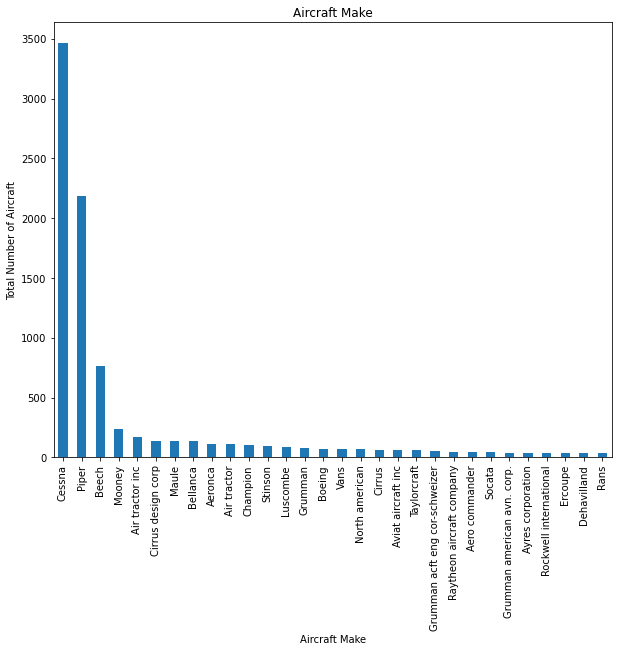

In [143]:
#Plot the graph showing Make
df = airplaneCommPrivUse_df_merged.Make.value_counts()
#Plotting the top 30 'Makes"
df[:30].plot(kind='bar', figsize=(10,8))
plt.title("Aircraft Make")
plt.xlabel("Aircraft Make")
plt.ylabel("Total Number of Aircraft")
plt.show()

In [145]:
#Create a clean dataset
airplaneCommPrivUse_df_merged.head()
#Save the new cleaned data
airplaneCommPrivUse_df_merged.to_csv("clean_aircraft.csv", index=False)

In [251]:
#Load and read the cleaned dataset
clean_aircraft_df = pd.read_csv("clean_aircraft.csv")
clean_aircraft_df.head()

,EventDate,Location,Country,Latitude,Longitude,InjurySeverity,Aircraftdamage,AircraftCategory,RegistrationNumber,Make,...,FARDescription,Purposeofflight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Abbreviation,Broadphaseofflight,US_State
0,2001-06-03,"LYTLE CREEK, CA",United States,34.241389,-117.539722,Fatal(1),Substantial,Airplane,N8253W,Piper,...,Part 91: General Aviation,Personal,1,0,0,0,VMC,CA,Maneuvering,California
1,2003-06-21,"Cushing, OK",United States,35.935833,-96.779167,Fatal(1),Destroyed,Airplane,N8548S,Cessna,...,Part 91: General Aviation,Skydiving,1,2,2,1,VMC,OK,Maneuvering,Oklahoma
2,2006-11-04,"Yuba City, CA",United States,38.967778,-121.626945,Fatal(2),Destroyed,Airplane,N158MD,Aircraft mfg & dev. co. (amd),...,Part 91: General Aviation,Personal,2,0,0,0,VMC,CA,Cruise,California
3,2006-12-07,"Summersville, WV",United States,38.248611,-80.976111,Fatal(1),Destroyed,Airplane,N9165T,Mooney,...,Part 91: General Aviation,Personal,1,0,0,0,IMC,WV,Cruise,West Virginia
4,2007-01-15,"ADJUNTAS, PR",United States,18.147222,-66.798333,Fatal(2),Substantial,Airplane,N90KB,Partenavia,...,Part 91: General Aviation,Personal,2,0,0,0,IMC,PR,Descent,Puerto Rico


In [253]:
#Check data types for clarity during visualization
clean_aircraft_df.dtypes

EventDate               object
Location                object
Country                 object
Latitude                object
Longitude               object
InjurySeverity          object
Aircraftdamage          object
AircraftCategory        object
RegistrationNumber      object
Make                    object
Model                   object
AmateurBuilt            object
NumberofEngines          int64
EngineType              object
FARDescription          object
Purposeofflight         object
TotalFatalInjuries       int64
TotalSeriousInjuries     int64
TotalMinorInjuries       int64
TotalUninjured           int64
WeatherCondition        object
Abbreviation            object
Broadphaseofflight      object
US_State                object
dtype: object

In [255]:
#Change the datatypes from float to integer to avoid decimal places as it represents people
clean_aircraft_df["TotalFatalInjuries"] = clean_aircraft_df["TotalFatalInjuries"].astype("int")
clean_aircraft_df["TotalSeriousInjuries"] = clean_aircraft_df["TotalSeriousInjuries"].astype("int")
clean_aircraft_df["TotalMinorInjuries"] = clean_aircraft_df["TotalMinorInjuries"].astype("int")
clean_aircraft_df["TotalUninjured"] = clean_aircraft_df["TotalUninjured"].astype("int")
clean_aircraft_df["NumberofEngines"] = clean_aircraft_df["NumberofEngines"].astype("int")

In [256]:
#Save the cleaned copy to a csv file
clean_aircraft_df.to_csv("clean_aircraft.csv", index=False)

In [257]:
#Access the cleaned dataset for use
clean_aircraft_df = pd.read_csv("clean_aircraft.csv")
clean_aircraft_df.head()

,EventDate,Location,Country,Latitude,Longitude,InjurySeverity,Aircraftdamage,AircraftCategory,RegistrationNumber,Make,...,FARDescription,Purposeofflight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,Abbreviation,Broadphaseofflight,US_State
0,2001-06-03,"LYTLE CREEK, CA",United States,34.241389,-117.539722,Fatal(1),Substantial,Airplane,N8253W,Piper,...,Part 91: General Aviation,Personal,1,0,0,0,VMC,CA,Maneuvering,California
1,2003-06-21,"Cushing, OK",United States,35.935833,-96.779167,Fatal(1),Destroyed,Airplane,N8548S,Cessna,...,Part 91: General Aviation,Skydiving,1,2,2,1,VMC,OK,Maneuvering,Oklahoma
2,2006-11-04,"Yuba City, CA",United States,38.967778,-121.626945,Fatal(2),Destroyed,Airplane,N158MD,Aircraft mfg & dev. co. (amd),...,Part 91: General Aviation,Personal,2,0,0,0,VMC,CA,Cruise,California
3,2006-12-07,"Summersville, WV",United States,38.248611,-80.976111,Fatal(1),Destroyed,Airplane,N9165T,Mooney,...,Part 91: General Aviation,Personal,1,0,0,0,IMC,WV,Cruise,West Virginia
4,2007-01-15,"ADJUNTAS, PR",United States,18.147222,-66.798333,Fatal(2),Substantial,Airplane,N90KB,Partenavia,...,Part 91: General Aviation,Personal,2,0,0,0,IMC,PR,Descent,Puerto Rico


In [258]:
clean_aircraft_df.dtypes

EventDate               object
Location                object
Country                 object
Latitude                object
Longitude               object
InjurySeverity          object
Aircraftdamage          object
AircraftCategory        object
RegistrationNumber      object
Make                    object
Model                   object
AmateurBuilt            object
NumberofEngines          int64
EngineType              object
FARDescription          object
Purposeofflight         object
TotalFatalInjuries       int64
TotalSeriousInjuries     int64
TotalMinorInjuries       int64
TotalUninjured           int64
WeatherCondition        object
Abbreviation            object
Broadphaseofflight      object
US_State                object
dtype: object

In [259]:
#Check which model are common
model_df = clean_aircraft_df.Model.value_counts()
model_df.head()

172     315
182     186
180     156
SR22    154
PA28    132
Name: Model, dtype: int64

In [336]:
#Check Make or Model against damage, grouping by the damage
clean_aircraft_df.groupby(['Aircraftdamage', 'Make'])['Make'].count()

Aircraftdamage  Make              
Destroyed       Aero commander        4
                Aero vodochody        2
                Aerofab inc.          1
                Aeronca               6
                Aeropro cz            1
                                     ..
Substantial     Zwicker murray r      1
Unknown         Aero commander        1
                Cessna                1
                Piper aircraft inc    1
                Swann lynn j          1
Name: Make, Length: 2633, dtype: int64

In [337]:
#How are the Aircraft associated with injuries
type(clean_aircraft_df)
clean_aircraft_df.groupby(['TotalFatalInjuries', 'Make'])['Make'].count()

TotalFatalInjuries  Make               
0                   177mf llc              1
                    2007 savage air llc    1
                    2021fx3 llc            1
                    781569 inc             1
                    Aardema robert john    1
                                          ..
9                   Pilatus                1
10                  Beech                  1
                    Textron aviation       1
11                  Beech                  1
14                  Pilatus                1
Name: Make, Length: 2744, dtype: int64

In [201]:
#Check if the aircrafts follow Federal Aviation Regulations (FAR)
clean_aircraft_df['FARDescription'].isna().sum()

0

In [266]:
#check how the engine type and number of engines are correlated with safety
x = clean_aircraft_df['NumberofEngines']
y = clean_aircraft_df['TotalFatalInjuries']
np.corrcoef(x,y)

array([[1.        , 0.14041973],
       [0.14041973, 1.        ]])

In [195]:
clean_aircraft_df.columns

Index(['EventDate', 'Location', 'Country', 'Latitude', 'Longitude',
       'InjurySeverity', 'Aircraftdamage', 'AircraftCategory',
       'RegistrationNumber', 'Make', 'Model', 'AmateurBuilt',
       'NumberofEngines', 'EngineType', 'FARDescription', 'Purposeofflight',
       'TotalFatalInjuries', 'TotalSeriousInjuries', 'TotalMinorInjuries',
       'TotalUninjured', 'WeatherCondition', 'Abbreviation',
       'Broadphaseofflight', 'US_State'],
      dtype='object')

In [279]:
#Check  Make vs Injury severity
clean_aircraft_df.groupby(['InjurySeverity', 'Make'])['Make'].count()

InjurySeverity  Make                         
Fatal           Adams donald l                    1
                Advertising mgmt & consulting     1
                Aero adventure                    1
                Aero commander                   11
                Aero sp z o o                     1
                                                 ..
Serious         Globe                             2
                Miller roger                      1
                Piper                             1
                Quicksilver aircraft co           1
                Sawby scott                       1
Name: Make, Length: 2679, dtype: int64

In [190]:
clean_aircraft_df.corr(method='pearson')

,NumberofEngines,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured
NumberofEngines,1.000000,0.140420,-0.018796,-0.011290,0.104715
TotalFatalInjuries,0.140420,1.000000,-0.139954,-0.029562,-0.188698
TotalSeriousInjuries,-0.018796,-0.139954,1.000000,0.007739,-0.151834
TotalMinorInjuries,-0.011290,-0.029562,0.007739,1.000000,-0.151278
TotalUninjured,0.104715,-0.188698,-0.151834,-0.151278,1.000000


The Number of Engines has weak relationships with the number of injuries whether be serious, minor or fatal injury. The same applies to the uninjured totals.

This can also be seen in the graphs below.

In [189]:
len(clean_aircraft_df['Make'].unique())

2454

In [280]:
x = clean_aircraft_df['NumberofEngines']
y = clean_aircraft_df['TotalFatalInjuries']
r = np.corrcoef(x,y)
r

array([[1.        , 0.14041973],
       [0.14041973, 1.        ]])

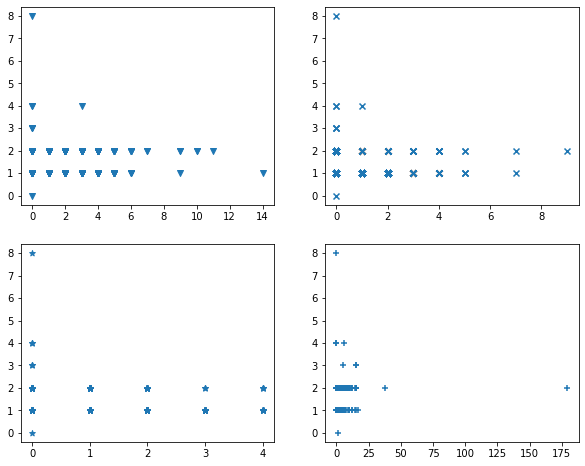

In [297]:
#Using scatter plot to chek relationship between number of Engines and injuries
fig, axs = plt.subplots(2,2, figsize =(10,8))
axs[0,0].scatter(x=clean_aircraft_df['TotalFatalInjuries'], y=clean_aircraft_df['NumberofEngines'], marker='v')
axs[0,1].scatter(x=clean_aircraft_df['TotalSeriousInjuries'], y=clean_aircraft_df['NumberofEngines'], marker='x')
axs[1,0].scatter(x=clean_aircraft_df['TotalMinorInjuries'], y=clean_aircraft_df['NumberofEngines'], marker='*')
axs[1,1].scatter(x=clean_aircraft_df['TotalUninjured'], y=clean_aircraft_df['NumberofEngines'], marker='+')
plt.show()

In [347]:
clean_aircraft_df['Model'].value_counts().tail()
clean_aircraft_df['Make'].value_counts().tail()

Nelson sydney        1
Post                 1
Quickie              1
Edwards douglas l    1
Citabria             1
Name: Make, dtype: int64

From the analysis, The Cessna aircraft Make is more common. It has the highest number of injuries but also leads on uninjurred.

On the comparing model and Severity of injury we find 'Air Tractor inc.' Make having the highest Non-Fatal accident/incidents. But we also see Cessna Make having more models that have Non-Fatal incidents/accidents.

Some other data cleaning challenges realised later. Which need more time for cleaning

In [291]:
#Some key attributes records are keyed in using different text
clean_aircraft_df['Make'].isin(['Air tractor inc.']).value_counts()
#clean_aircraft.loc[clean_aircraft['Model'], clean_aircraft['Make'] == "Air tractor inc"]#.value_counts()
(clean_aircraft_df['Make']=="Air tractor").value_counts()

False    12268
True       108
Name: Make, dtype: int64

In [292]:
(clean_aircraft_df['Make']=="Air tractor inc").value_counts()

False    12209
True       167
Name: Make, dtype: int64

In [293]:
(clean_aircraft_df['Make']=="Air tractor inc.").value_counts()

False    12373
True         3
Name: Make, dtype: int64


## Recommendations
1. We would recomend the top 3 showing more safety in terms of non-Fatal accidents and Level of Damage. i.e.: Cessna, Air tractor, and Piper Make.

2. The model that has low-risk are the Air Tractor Inc. models.
3. More research to be done based on other factors before making a decision on the chose of Airplane.